In [14]:
# pip install pandas
# pip install matplotlib
# pip install pyvista
# pip install ipyvtklink

SyntaxError: invalid syntax (553101774.py, line 1)

In [1]:
import os
import pandas as pd
import matplotlib as mpl
import numpy as np

# focusing on student system 5, student u1822962b
master_dir = './debriefing data/system 2/U1720205F/'

master_df = pd.DataFrame()
for file in os.listdir(master_dir):
    if file.endswith(".csv") and file[0:3] == "ptn":
        new_col_name = file.split(".")[0]
        each_df = pd.read_csv(master_dir + file, header=None)
        each_df = each_df.abs()
        each_df[new_col_name] = each_df.sum(axis=1)
        master_df = pd.concat([master_df, each_df[new_col_name]], axis=1)


In [2]:
files_without_changes = []
files_with_changes = []

for col_name in master_df:
    col_min = master_df[col_name].min()
    col_max = master_df[col_name].max()
    
    if (col_min == col_max):
        files_without_changes.append(col_name)
    else:
        files_with_changes.append(col_name)


<AxesSubplot: >

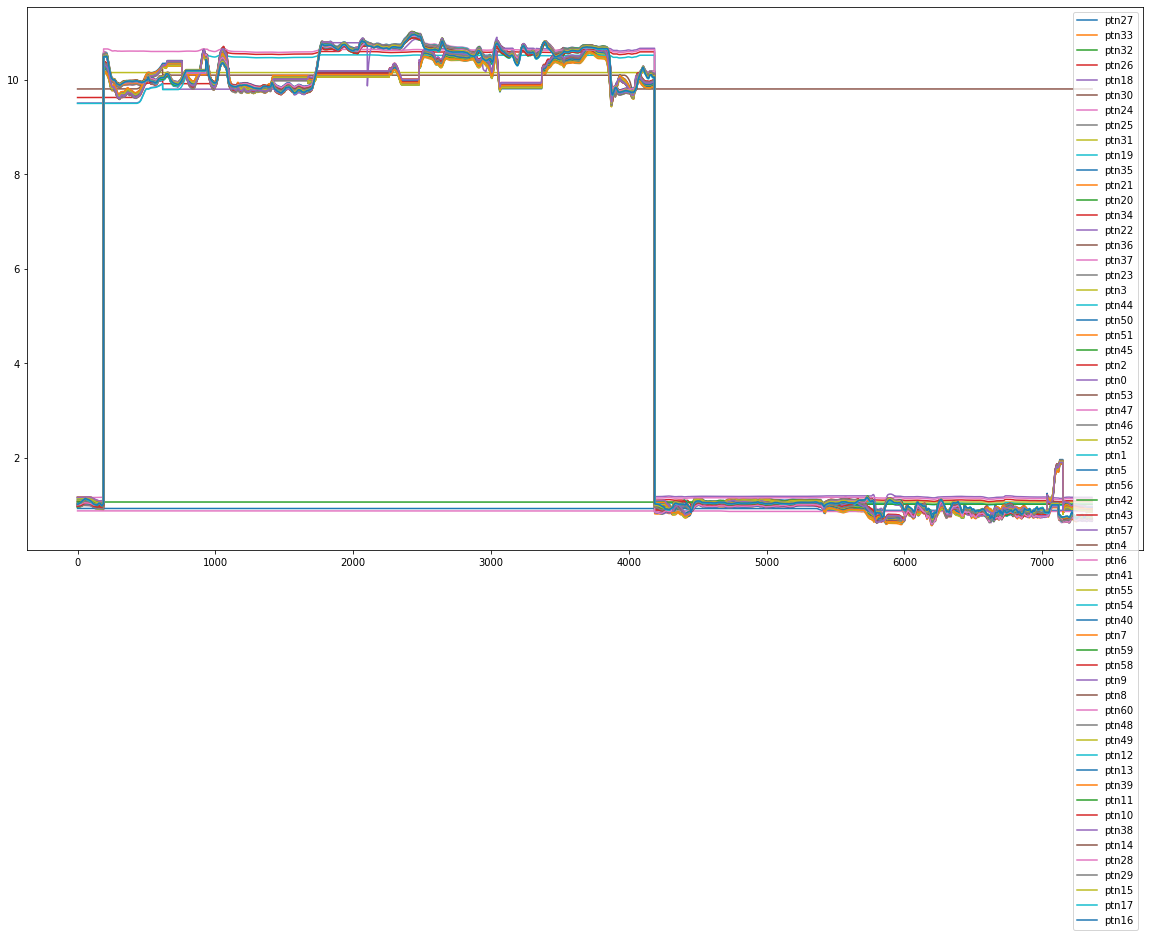

In [3]:
master_df_with_changes = master_df[files_with_changes]
master_df_with_changes.head()
master_df_with_changes.plot(kind='line', figsize=(20, 10))

In [28]:
print("These files has no changes:\n", files_without_changes)

# RTN 0,1,2,5 and 59 are the only files that exhibit changes. 
# We observe that RTN 5, 59 has little changes whereas RTN 0, 1 and 2 have extreme fluctuations.


These files has no changes:
 []


./U1720205F_PTN43/mesh-1.png
./U1720205F_PTN43/mesh-2.png
./U1720205F_PTN43/mesh-3.png
./U1720205F_PTN43/mesh-4.png
./U1720205F_PTN43/mesh-5.png
./U1720205F_PTN43/mesh-6.png
./U1720205F_PTN43/mesh-7.png
./U1720205F_PTN43/mesh-8.png
./U1720205F_PTN43/mesh-9.png
./U1720205F_PTN43/mesh-10.png
./U1720205F_PTN43/mesh-11.png
./U1720205F_PTN43/mesh-12.png
./U1720205F_PTN43/mesh-13.png
./U1720205F_PTN43/mesh-14.png
./U1720205F_PTN43/mesh-15.png
./U1720205F_PTN43/mesh-16.png
./U1720205F_PTN43/mesh-17.png
./U1720205F_PTN43/mesh-18.png
./U1720205F_PTN43/mesh-19.png
./U1720205F_PTN43/mesh-20.png


/var/folders/s4/2qyg4xz168lczdgbql2r10d40000gn/T/ipykernel_98165/3810247420.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


./U1720205F_PTN43/mesh-21.png
./U1720205F_PTN43/mesh-22.png
./U1720205F_PTN43/mesh-23.png
./U1720205F_PTN43/mesh-24.png
./U1720205F_PTN43/mesh-25.png
./U1720205F_PTN43/mesh-26.png
./U1720205F_PTN43/mesh-27.png
./U1720205F_PTN43/mesh-28.png
./U1720205F_PTN43/mesh-29.png
./U1720205F_PTN43/mesh-30.png
./U1720205F_PTN43/mesh-31.png
./U1720205F_PTN43/mesh-32.png
./U1720205F_PTN43/mesh-33.png
./U1720205F_PTN43/mesh-34.png
./U1720205F_PTN43/mesh-35.png
./U1720205F_PTN43/mesh-36.png
./U1720205F_PTN43/mesh-37.png
./U1720205F_PTN43/mesh-38.png
./U1720205F_PTN43/mesh-39.png
./U1720205F_PTN43/mesh-40.png
./U1720205F_PTN43/mesh-41.png
./U1720205F_PTN43/mesh-42.png
./U1720205F_PTN43/mesh-43.png
./U1720205F_PTN43/mesh-44.png
./U1720205F_PTN43/mesh-45.png
./U1720205F_PTN43/mesh-46.png
./U1720205F_PTN43/mesh-47.png
./U1720205F_PTN43/mesh-48.png
./U1720205F_PTN43/mesh-49.png
./U1720205F_PTN43/mesh-50.png
./U1720205F_PTN43/mesh-51.png
./U1720205F_PTN43/mesh-52.png
./U1720205F_PTN43/mesh-53.png
./U1720205

ValueError: x and y arrays must consist of at least 3 unique points

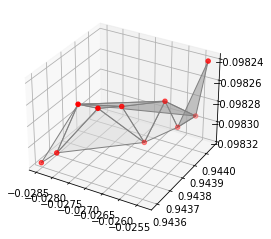

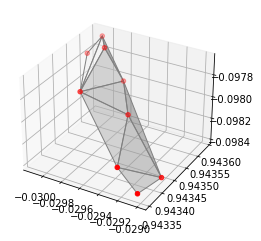

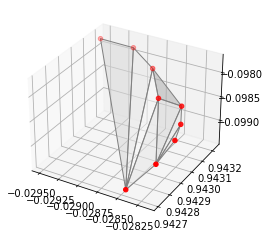

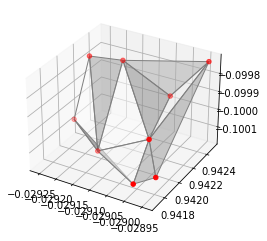

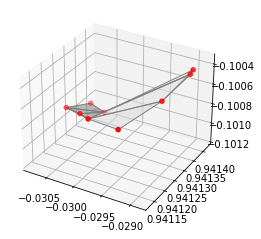

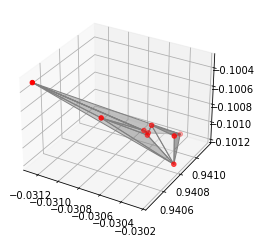

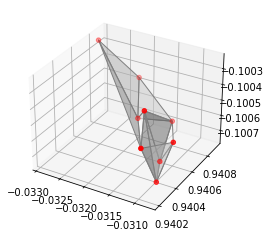

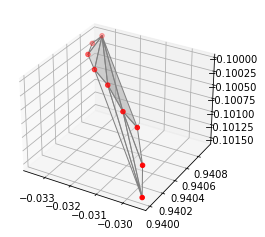

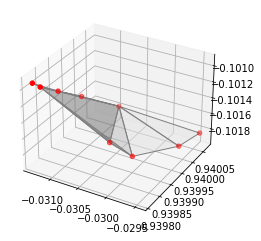

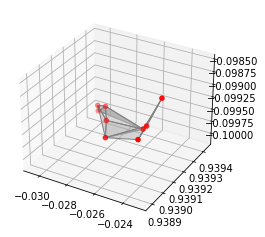

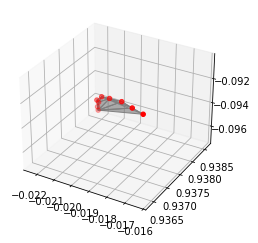

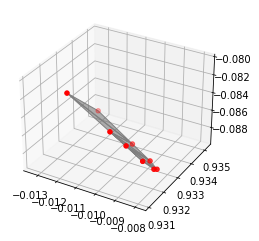

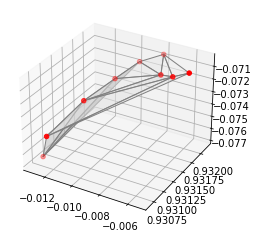

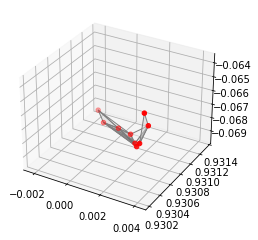

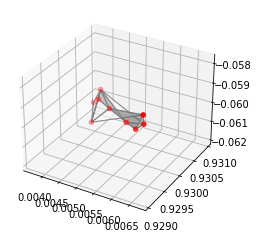

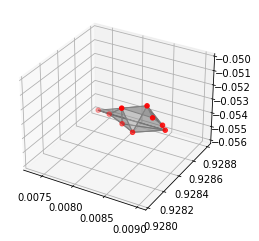

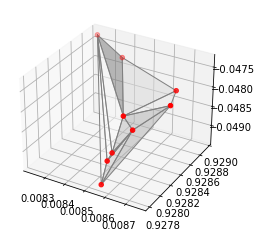

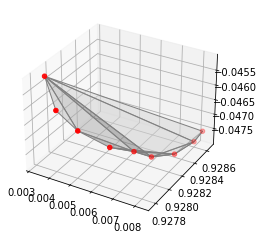

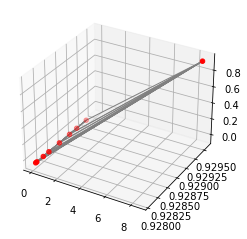

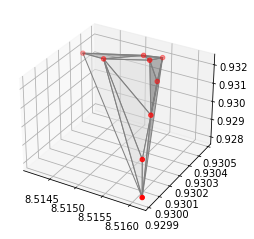

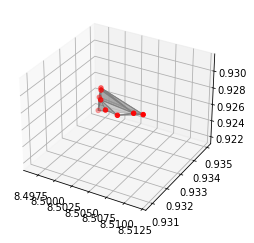

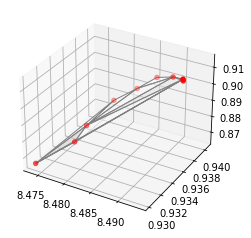

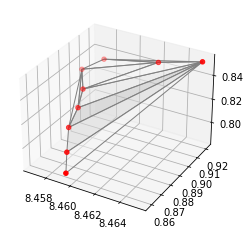

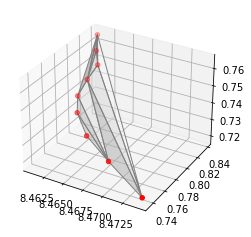

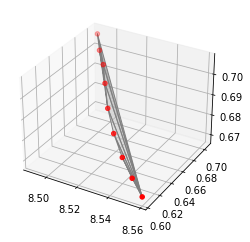

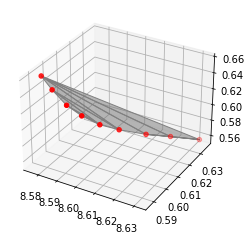

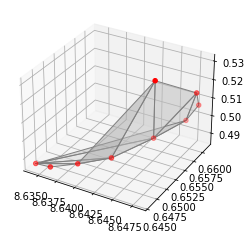

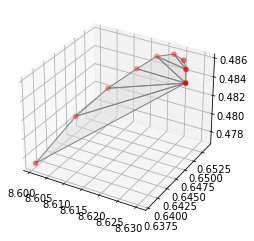

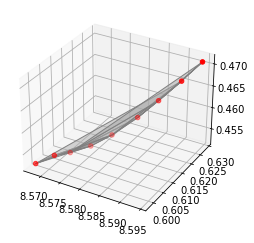

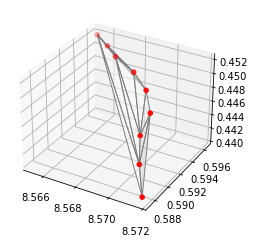

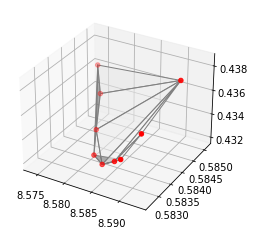

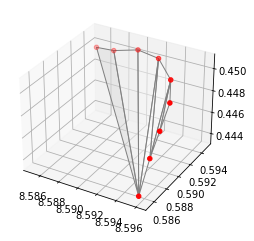

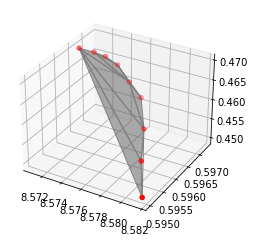

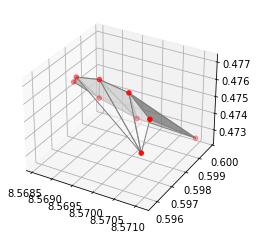

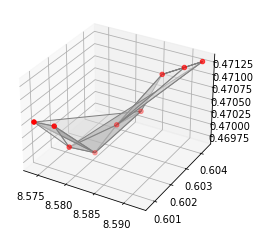

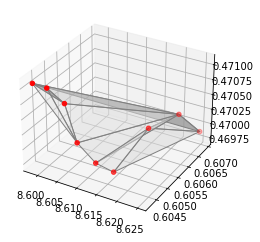

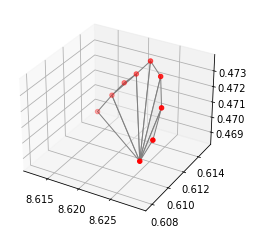

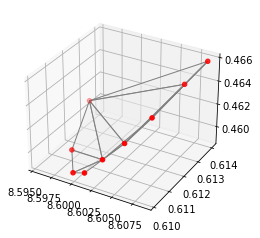

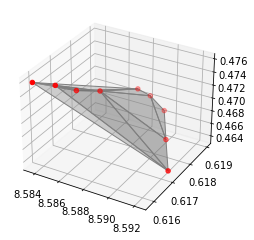

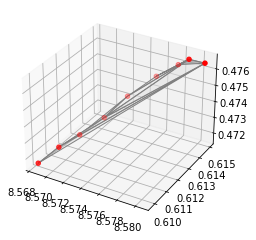

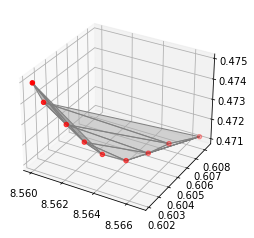

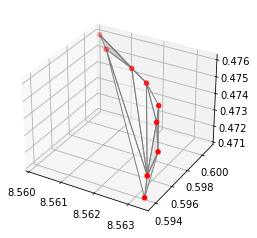

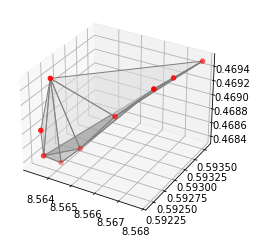

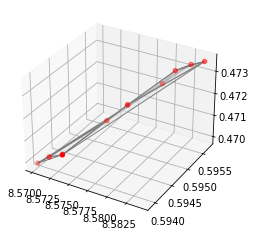

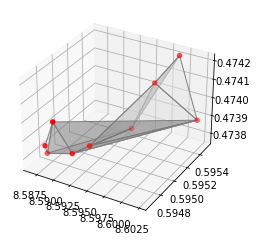

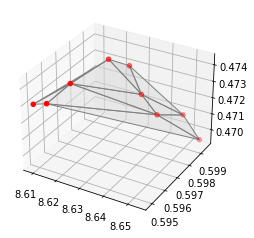

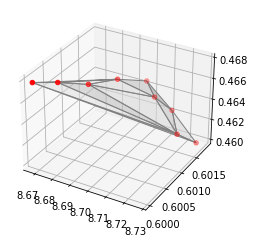

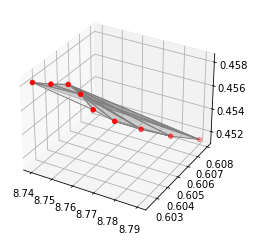

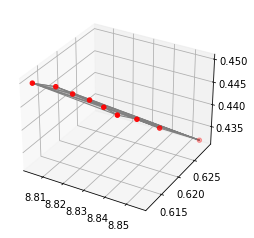

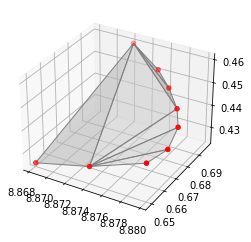

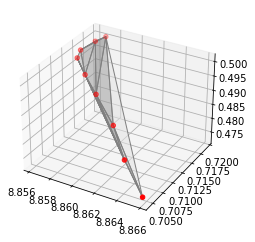

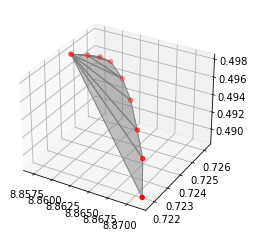

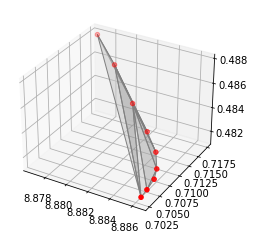

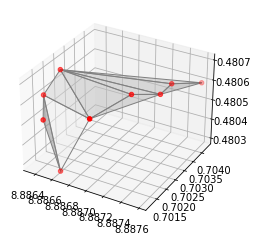

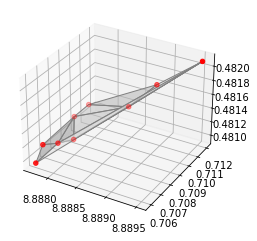

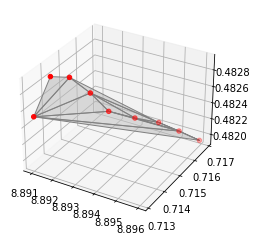

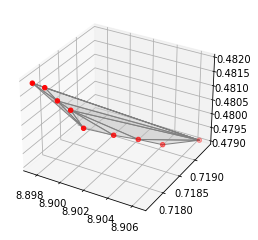

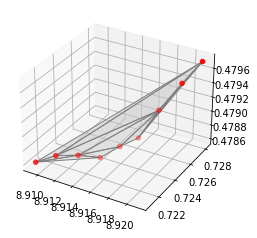

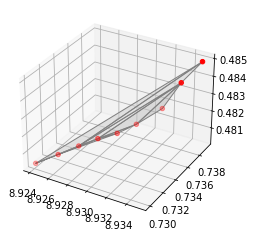

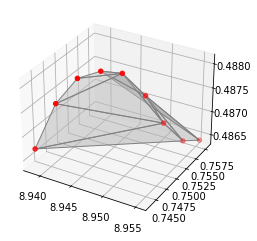

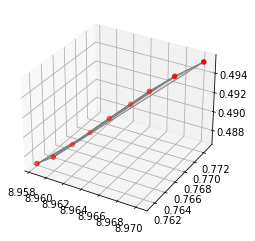

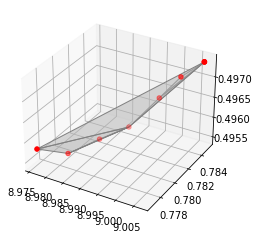

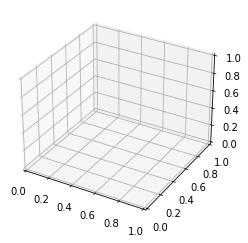

In [20]:
# getting 3d files
import matplotlib.pyplot as plt

import pyvista as pv

# focus on ptn43 because there are quite a bit of changes
U1720205F_ptn43_folder = "./U1720205F_PTN43/"
ptn43_file = "ptn43.csv"
ptn43_file_df = pd.read_csv(master_dir + ptn43_file, header=None)

each_sub_plot = []
for i, row in ptn43_file_df.iterrows():
    if i!=0 and i % 10 == 0:
        file_name = "mesh-" + str(int(i/10)) + ".png"

        subPlot = np.array(each_sub_plot)
        X, Y, Z = subPlot[:,0], subPlot[:,1], subPlot[:,2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)
        ax.scatter(X, Y, Z, c='red')
        saveFile = U1720205F_ptn43_folder + file_name
        plt.savefig(saveFile)

#         print(point_cloud)
#         file_name = "mesh-" + str(int(i/10)) + ".stl"
#         point_cloud.save(U1720205F_ptn43_stl_folder + file_name)
#         point_cloud.save("test.stl")
        each_sub_plot = []
    else:
        each_sub_plot.append(np.array(row))
    


In [8]:
# visualise ptn43 in 3D
import pyvista as pv

point_cloud = pv.PolyData(ptn43_file_df)
point_cloud.plot(render_points_as_spheres=True)


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)